In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv('/content/titanic2.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
df['Embarked'] = df['Embarked'].fillna('S')

In [74]:
df['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)

In [75]:
mean = df['Age'].mean()
df['Age'].fillna(mean, inplace=True)

In [76]:
df['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [77]:
df  = df.drop(['Name','PassengerId','Ticket','Cabin'],axis = 1)

In [78]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [79]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1
887,1,1,1,19.000000,0,0,30.0000,1
888,0,3,1,29.699118,1,2,23.4500,1
889,1,1,0,26.000000,0,0,30.0000,2


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
scaler.fit_transform(df)

array([[-0.78927234,  0.82737724, -0.73769513, ..., -0.47367361,
        -0.50244517, -0.56883712],
       [ 1.2669898 , -1.56610693,  1.35557354, ..., -0.47367361,
         0.78684529,  1.00518113],
       [ 1.2669898 ,  0.82737724,  1.35557354, ..., -0.47367361,
        -0.48885426, -0.56883712],
       ...,
       [-0.78927234,  0.82737724,  1.35557354, ...,  2.00893337,
        -0.17626324, -0.56883712],
       [ 1.2669898 , -1.56610693, -0.73769513, ..., -0.47367361,
        -0.04438104,  1.00518113],
       [-0.78927234,  0.82737724, -0.73769513, ..., -0.47367361,
        -0.49237783,  2.57919938]])

In [85]:
df.shape

(891, 8)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis = 1),df['Survived'],test_size = 0.2,random_state = 42)

In [122]:
inputs = keras.Input(shape=(X_train.shape[1],))
x = layers.BatchNormalization()(inputs)
x = layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [124]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
histoy = model.fit(X_train,y_train,epochs = 50,batch_size = 32,verbose = 2)
loss, accuracy = model.evaluate(X_test, y_test, verbose=2, batch_size=32)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
23/23 - 0s - loss: 0.4942 - accuracy: 0.8174 - 115ms/epoch - 5ms/step
Epoch 2/50
23/23 - 0s - loss: 0.4904 - accuracy: 0.8104 - 111ms/epoch - 5ms/step
Epoch 3/50
23/23 - 0s - loss: 0.4945 - accuracy: 0.8272 - 113ms/epoch - 5ms/step
Epoch 4/50
23/23 - 0s - loss: 0.5085 - accuracy: 0.8188 - 111ms/epoch - 5ms/step
Epoch 5/50
23/23 - 0s - loss: 0.5067 - accuracy: 0.8188 - 104ms/epoch - 5ms/step
Epoch 6/50
23/23 - 0s - loss: 0.4907 - accuracy: 0.8216 - 110ms/epoch - 5ms/step
Epoch 7/50
23/23 - 0s - loss: 0.5059 - accuracy: 0.8160 - 138ms/epoch - 6ms/step
Epoch 8/50
23/23 - 0s - loss: 0.5001 - accuracy: 0.8090 - 110ms/epoch - 5ms/step
Epoch 9/50
23/23 - 0s - loss: 0.4808 - accuracy: 0.8272 - 123ms/epoch - 5ms/step
Epoch 10/50
23/23 - 0s - loss: 0.4883 - accuracy: 0.8329 - 113ms/epoch - 5ms/step
Epoch 11/50
23/23 - 0s - loss: 0.4925 - accuracy: 0.8062 - 119ms/epoch - 5ms/step
Epoch 12/50
23/23 - 0s - loss: 0.5142 - accuracy: 0.8020 - 111ms/epoch - 5ms/step
Epoch 13/50
23/23 - 0s - 

In [125]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 7)]               0         
                                                                 
 batch_normalization_29 (Ba  (None, 7)                 28        
 tchNormalization)                                               
                                                                 
 dense_15 (Dense)            (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               66048     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                          

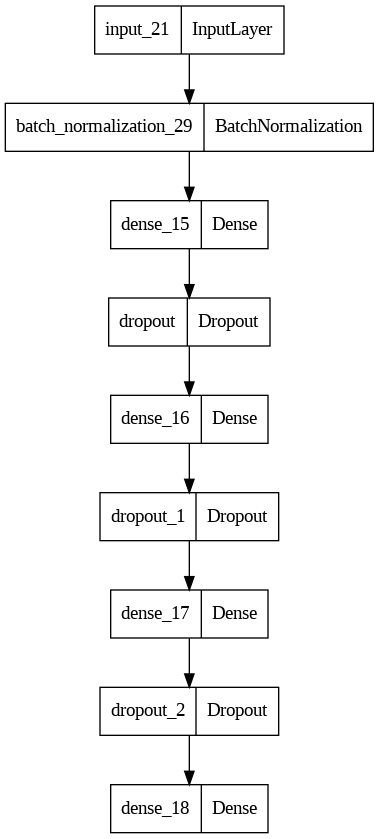

In [126]:
from tensorflow.keras.utils import plot_model
plot_model(model)